In [56]:
import numpy as np
from sklearn import datasets

In [57]:
iris_dataset = datasets.load_iris()

In [58]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [60]:
print(iris_dataset.feature_names, "\n", iris_dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 ['setosa' 'versicolor' 'virginica']


In [61]:
X = iris_dataset.data
y = iris_dataset.target

In [62]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


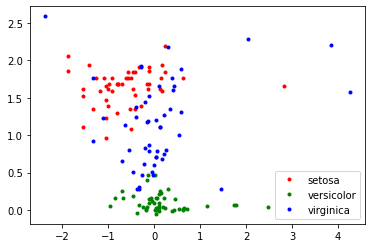

In [71]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y == 0] * X[:, 1][y == 0], X[:, 2][y == 0] * X[:, 3][y == 0], 'r.', label="setosa") #(sepal area, petal area)
plt.plot(X[:, 0][y == 1] * X[:, 1][y == 1], X[:, 2][y == 1] * X[:, 3][y == 1], 'g.', label="versicolor")
plt.plot(X[:, 0][y == 2] * X[:, 1][y == 2], X[:, 2][y == 2] * X[:, 3][y == 2], 'b.', label="virginica")
plt.legend()

plt.legend()


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
regressor.score(X, y)

0.9666666666666667

In [67]:
y_predict = regressor.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])